<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Moving Statistics


In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Load the Unemployment data set. Perform any necessary cleaning and preprocess the data by creating a `datetime` index.

In [2]:
unemp = pd.read_csv('../data/unemployment.csv')
unemp.head()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [3]:
unemp.tail()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
170,1990Q3,5.6%
171,1990Q4,5.9%
172,1991Q1,6.5%
173,1991Q2,6.833%
174,Seasonally adjusted quarterly U.S. unemploymen...,NaN


In [4]:
# Drop messed up last row
# /scrub/
unemp.drop(174, inplace=True)
unemp.tail()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
169,1990Q2,5.333%
170,1990Q3,5.6%
171,1990Q4,5.9%
172,1991Q1,6.5%
173,1991Q2,6.833%


In [5]:
# Check for additional nulls
# /scrub/
unemp.isnull().sum()

Quarter                                                                    0
Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993    0
dtype: int64

In [6]:
# Simplify column names
# /scrub/
unemp.columns = ['year_quarter', 'unemployment_rate']
unemp.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [7]:
# Convert unemployment rate to float
# /scrub/
unemp.loc[:, 'unemployment_rate'] = (
    unemp.loc[:, 'unemployment_rate'].str.replace('%','').apply(float)
)
unemp.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733
1,1948Q2,3.667
2,1948Q3,3.767
3,1948Q4,3.833
4,1949Q1,4.667


In [8]:
# Check data types
# /scrub/
unemp.dtypes

year_quarter          object
unemployment_rate    float64
dtype: object

In [9]:
# Converting to datetime using .dt.to_period('Q')
# /scrub/
unemp.loc[:, 'date'] = pd.to_datetime(unemp.loc[:, 'year_quarter']).dt.to_period('Q')
unemp.set_index('date', inplace=True)
unemp.head()

,year_quarter,unemployment_rate
date,,
1948Q1,1948Q1,3.733
1948Q2,1948Q2,3.667
1948Q3,1948Q3,3.767
1948Q4,1948Q4,3.833
1949Q1,1949Q1,4.667


In [10]:
# Confirm that objects in index are correct datetimes
# /scrub/
unemp.index.month

Int64Index([ 3,  6,  9, 12,  3,  6,  9, 12,  3,  6,
            ...
             3,  6,  9, 12,  3,  6,  9, 12,  3,  6],
           dtype='int64', name='date', length=174)

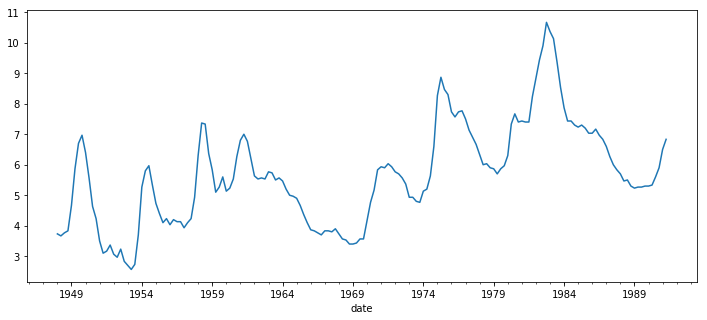

In [11]:
# Plot the unemployment rate
# /scrub/
fig, ax = plt.subplots(figsize=(12,5))
unemp.loc[:, 'unemployment_rate'].plot(ax=ax);

## Rolling Statistics

In [12]:
# Calculate yearly means
# /scrub/
yearly_mean = unemp.loc[:, 'unemployment_rate'].resample('A').mean()
yearly_mean.head()

date
1948    3.75000
1949    6.05025
1950    5.20825
1951    3.28350
1952    3.02500
Freq: A-DEC, Name: unemployment_rate, dtype: float64

Rolling means are used to smooth out noise in time series data and highlight overall trends.

A **simple rolling mean** with **window size** $n$ is the average of the $n$ previous values.

In [13]:
# Extract three-year simple rolling means
# /scrub/
three_year_rolling_mean = yearly_mean.rolling(window=3, center=False).mean()

**Exercise.** Why are the first two values null?

/scrub/

There are not enough previous values to calculate the rolling mean.

---

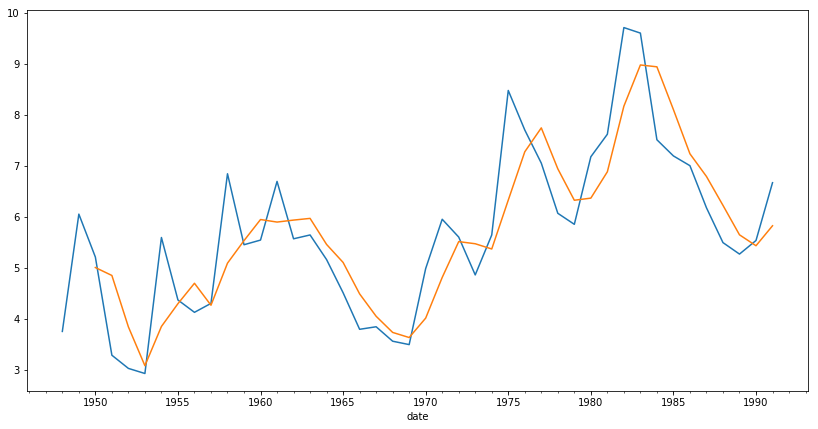

In [14]:
# Plot the yearly mean and three-year rolling mean together
# /scrub/
fig, ax = plt.subplots(figsize=(14,7))

yearly_mean.plot(ax=ax)
three_year_rolling_mean.plot(ax=ax);

**Exercise.** Why does the rolling mean appear to lag behind the original series?

/scrub/

It is including previous values in the average.

**Exercise.**

- Calculate the simple rolling mean with `window=5` and `window=15`. Plot both together with the original data.

In [15]:
# /scrub/

five_year_rolling_mean = yearly_mean.rolling(window=5, center=False).mean()
ten_year_rolling_mean = yearly_mean.rolling(window=10, center=False).mean()

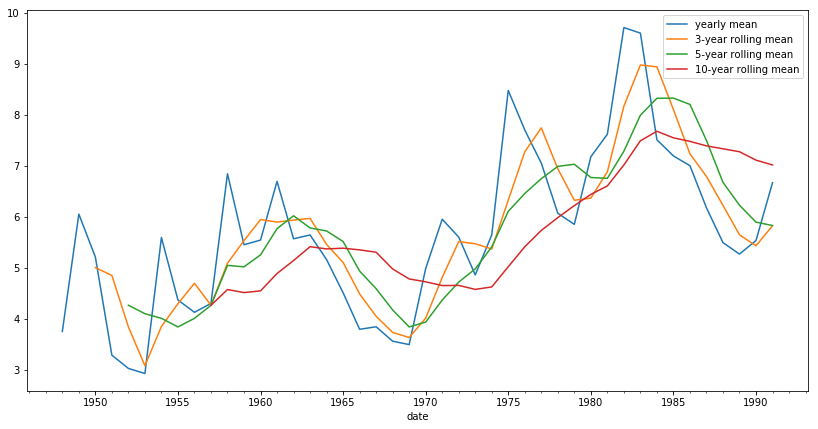

In [16]:
# /scrub/

fig, ax = plt.subplots(figsize=(14,7))

one = yearly_mean.plot(ax=ax, label='yearly mean')
three = three_year_rolling_mean.plot(ax=ax, label='3-year rolling mean')
five = five_year_rolling_mean.plot(ax=ax, label='5-year rolling mean')
ten = ten_year_rolling_mean.plot(ax=ax, label='10-year rolling mean')
ax.legend();

- Recreate the plot above but with the rolling medians (of the annual means) instead of rolling means.

In [17]:
# /scrub/

three_year_rolling_median = yearly_mean.rolling(window=3, center=False).median()
five_year_rolling_median = yearly_mean.rolling(window=5, center=False).median()
ten_year_rolling_median = yearly_mean.rolling(window=10, center=False).median()

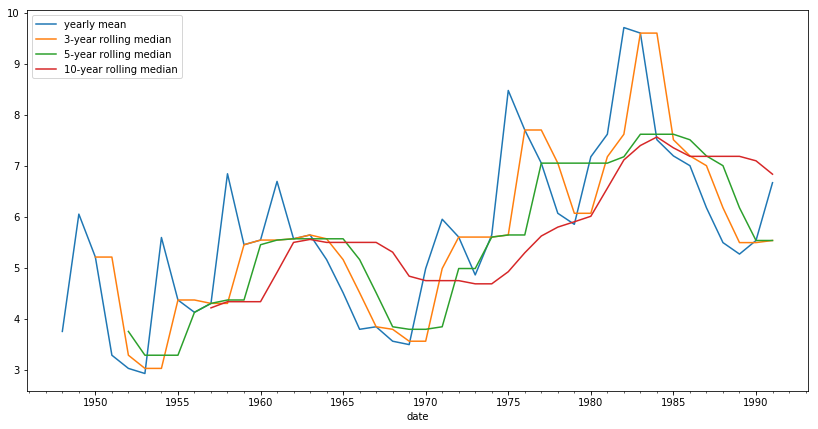

In [18]:
# /scrub/

fig, ax = plt.subplots(figsize=(14,7))

one = yearly_mean.plot(ax=ax, label='yearly mean')
three = three_year_rolling_median.plot(ax=ax, label='3-year rolling median')
five = five_year_rolling_median.plot(ax=ax, label='5-year rolling median')
ten = ten_year_rolling_median.plot(ax=ax, label='10-year rolling median')
ax.legend();

- Why might you want to use a rolling median instead of a rolling mean or vice versa?

Medians are less sensitive to extreme values. If extreme values are noise that you want to smooth away, use a median. If they are real phenomena that you want to preserve, use a mean.

- **Bonus:** Use the syntax illustrated below to a legend to one or both of your figures above.

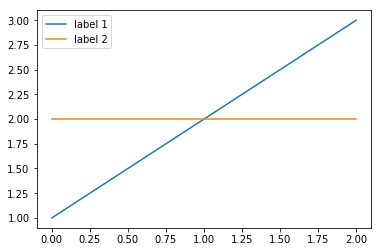

In [19]:
# /scrub/

fig, ax = plt.subplots()
line1 = ax.plot([1, 2, 3], label='label 1')
line2 = ax.plot([2, 2, 2], label='label 2')
ax.legend();

---

A **centered rolling mean** with window size $n$ is the average of the $n$ values centered on the current time step.

In [20]:
# Extract three-year centered rolling means
# /scrub/
three_year_centered_rolling_mean = yearly_mean.rolling(window=3, center=True).mean()

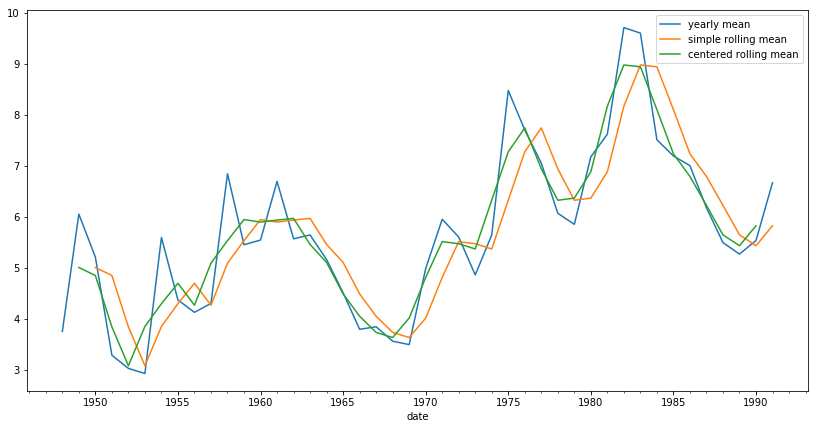

In [21]:
# Plot the yearly mean, three-year simple rolling mean, and three year centered rolling mean
# /scrub/
fig, ax = plt.subplots(figsize=(14,7))

yearly_mean.plot(ax=ax, label='yearly mean')
three_year_rolling_mean.plot(ax=ax, label='simple rolling mean')
three_year_centered_rolling_mean.plot(ax=ax, label='centered rolling mean')
ax.legend();

**Exercise.** What differences do you notice between the simple rolling mean and the centered rolling mean? Can you think of any advantages for the simple rolling mean?

/scrub/

- The centered rolling mean does not show lag.
- The centered rolling mean is null in the first and last positions, whereas the simple rolling mean is null in the first two positions.

One advantage of the simple rolling mean is that it can be calculated in real time.

---

A **weighted rolling mean** treats some values as more important than others.

The most common kind of weighted rolling mean is an **exponentially weighted moving average**, in which weights decay exponentially as you go back in time.

The weight placed on an observation $s$ time steps in the past in an exponentially weighted moving average is proportional to $(1-\alpha)^s$ for some **decay rate** alpha. For instance, with $\alpha=.1$, the exponentially weighted moving average of $x$ at time $t$ would be proportional to the following sum:

$$EMA_t \propto x_t + .9*x_{t-1} + .9^2*x_{t-2} + .9^3*x_{t-2} + \ldots$$

The weights have to sum to 1, so to replace the proportionality with equality you would have to divide by the sum of the weights:

$$EMA_t = \frac{x_t + .9*x_{t-1} + .9^2*x_{t-2} + .9^3*x_{t-2} + \ldots}{1 + .9 + .9^2 + \ldots}$$

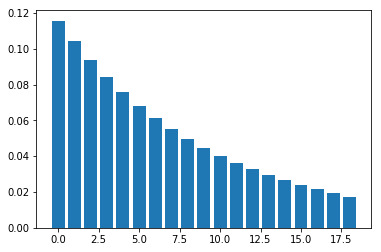

In [22]:
# Plot weights in an exponentially weighted moving average over 20 items
# /scrub/
num_items = 19
alpha = .1

x = range(num_items)
y = alpha * np.array([(1-alpha)**num for num in range(num_items)])
y /= sum(y)

fig, ax = plt.subplots()
ax.bar(x, y);

**Implications:**

- The greater the decay rate $\alpha$ is (between zero and one), the more weight the moving average places on the most recent observations. (Change alpha in the plot above to illustrate this fact.)
- A single observation continues to influence an exponentially weighted rolling mean forever (but less and less and less...), unlike an unweighted rolling mean in which it eventually falls outside the window.
- The standard exponentially weighted moving average lags behind the time series.

Sometimes the weight is described in terms of **span** or **half-life**. We will use span:

$$span = 2/\alpha - 1$$

An exponentially weighted moving average with span $n$ is commonly called e.g. a "$n$-day" exponentially weighted moving average (for daily data); about 86% of the weight falls on the time periods within the span.

In [23]:
# Calculate 10-year exponentially weighted moving average of unemployment
# /scrub/
ten_year_ewma = yearly_mean.ewm(span=10).mean()
ten_year_ewma

date
1948    3.750000
1949    5.015137
1950    5.092767
1951    4.496694
1952    4.074211
1953    3.775721
1954    4.213311
1955    4.248162
1956    4.221312
1957    4.237789
1958    4.769745
1959    4.905659
1960    5.030455
1961    5.351871
1962    5.392918
1963    5.440061
1964    5.387122
1965    5.222940
1966    4.956846
1967    4.750324
1968    4.530330
1969    4.339185
1970    4.457504
1971    4.731037
1972    4.890130
1973    4.884302
1974    5.022588
1975    5.652631
1976    6.025988
1977    6.212626
1978    6.186005
1979    6.124859
1980    6.316048
1981    6.552751
1982    7.126990
1983    7.576956
1984    7.564457
1985    7.496613
1986    7.406284
1987    7.182341
1988    6.874879
1989    6.582428
1990    6.391634
1991    6.441617
Freq: A-DEC, Name: unemployment_rate, dtype: float64

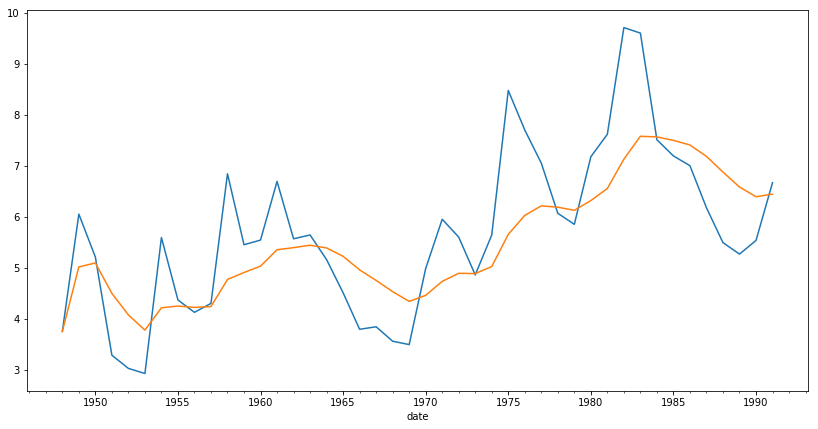

In [24]:
# Plot the 10-year exponentially weighted moving average of unemployment with the yearly average
# /scrub/
fig, ax = plt.subplots(figsize=(14, 7))
yearly_mean.plot(ax=ax, label='yearly mean')
ten_year_ewma.plot(ax=ax, label='5-year EWMA');

## Expanding Statistics

The **expanding mean** at a given time is the mean of all values up to that time.

In [25]:
# Calculate the expanding mean of unemployment
# /scrub/
expanding_mean = unemp.expanding().mean()
expanding_mean.head()

,year_quarter,unemployment_rate
date,,
1948Q1,1948Q1,3.733000
1948Q2,1948Q2,3.700000
1948Q3,1948Q3,3.722333
1948Q4,1948Q4,3.750000
1949Q1,1949Q1,3.933400


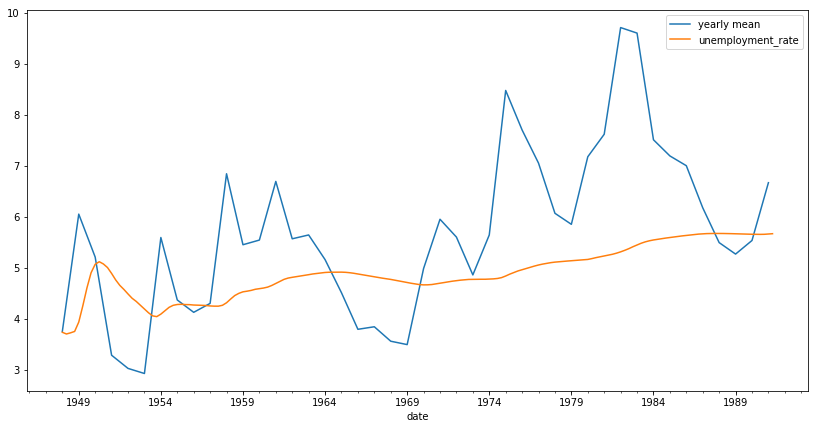

In [26]:
# Plot the expanding mean against the yearly mean
# /scrub/
fig, ax = plt.subplots(figsize=(14, 7))

yearly_mean.plot(ax=ax, label='yearly mean')
expanding_mean.plot(ax=ax, label='expanding mean')
ax.legend();

## Differencing

We are often interested in the **change** in a time series, as in this example:

![](../assets/jobs_change.png)

[Source](https://fivethirtyeight.com/features/the-u-s-job-market-is-on-a-historic-growth-streak/)

There's a Pandas method for that: `.diff`

In [27]:
# Diff the unemployment rate
# /scrub/
unemp.loc[:, 'unemp_diff'] = unemp.loc[:, 'unemployment_rate'].diff()

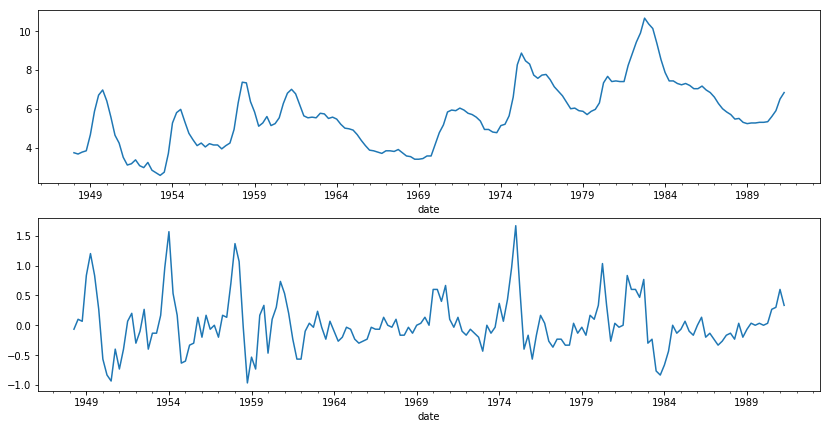

In [28]:
# Plot unemployment rate and its differences in vertically arranged subplots
# /scrub/
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))

unemp.loc[:, 'unemployment_rate'].plot(ax=ax0)
unemp.loc[:, 'unemp_diff'].plot(ax=ax1);

Differencing can be used to **detrend** a time series:

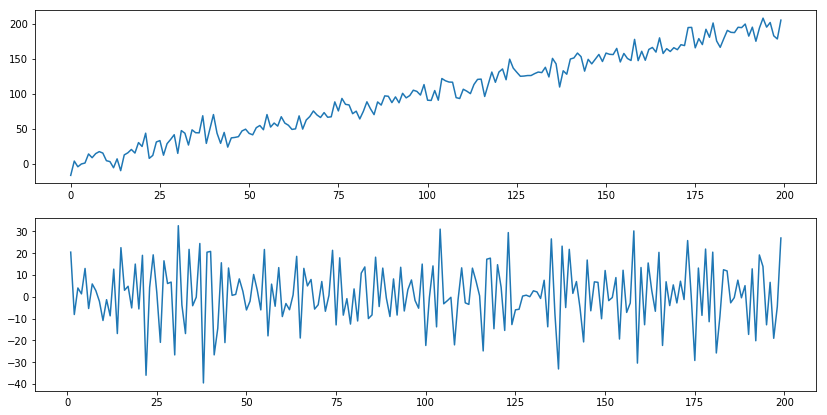

In [29]:
x = range(200)
y = x + 10*np.random.randn(200)
diff = pd.Series(y).diff()

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))
ax0.plot(x, y)
ax1.plot(x, diff);

A constant trend in a time series simply becomes the mean of the differenced time series.

Many time series modeling techniques assume that there is no trend, so detrending by differencing can be a useful preprocessing step.

# Questions?

# [Exit Tickets](https://docs.google.com/forms/d/1BW4rVsCx8Nzp3q2B7SQ_tL1xqKZr4GGoQ5qeZfayxh4/viewform?ts=5ad40144&edit_requested=true)